PCSE 503  
Eric Miers  
December 18, 2020

# Assignment 4

Due Date:  11:59pm on Monday, December 21st (Merry Yule!)

You are definitely allowed to ask me questions as you work through these problems.

## Question 1 - RLC Filter Design

******* PLEASE READ CAREFULLY *******
In order to run PySpice, it is necessary to install the PySpice python library, as well as a C-based backend called ngspice.

If you have your own local Jupyter Notebook/Python installation, you should be able to start with the Jupyter notebook called CircuitAnalysis_AC_RLC_Bode.ipynb for each part of this question, provided that you have already installed PySpice and ngspice (as I have done on my JupyterHub server already).

If you are using Google Colaboratory, you should be able to start with the Jupyter notebook called CircuitAnalysis_AC_RLC_Bode_GoogleColab.ipynb for each part of this question.  I have modified this notebook to install PySpice and ngspice in the first cell.



(a) Design a low pass filter that has cut-off (or resonant) frequency of 100 Hz, and that has a gain of 1 at the resonant frequency.  Create a plot of the gain vs. frequency.

What is the maximum gain of this filter, and at what frequency does this maximum gain occur?

(b) Design a high pass filter that has a cut-off frequency of 1000 Hz, and that has a gain of 1 at the resonant frequency.  Create a plot of the gain vs. frequency.

(c) Another interesting type of simple filter is called a Twin-T Notch Filter:

<img src="TwinTNotch.png">

Design a twin-T notch filter with its "notch" at 60 Hz.  The notch frequency is given by:

$ f_{notch} = \frac{1}{2 \pi R C} $

In [ ]:
import math

import numpy as np
import matplotlib.pyplot as plt

!pip install PySpice

!cat /etc/*release 
!rm libngspice.so*
!rm libngspice.la*
!wget http://www.pcs.cnu.edu/~brash/libngspice.so
!wget http://www.pcs.cnu.edu/~brash/libngspice.la

!rm /usr/local/lib/libngspice.*
!cp /content/libngspice.so /usr/local/lib/libngspice.so.0.0.0
!ln -snf /usr/local/lib/libngspice.so.0.0.0 /usr/local/lib/libngspice.so.0
!ln -snf /usr/local/lib/libngspice.so.0.0.0 /usr/local/lib/libngspice.so
!cp /content/libngspice.la /usr/local/lib/libngspice.la
!ls -al /usr/local/lib
!sudo ldconfig

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

     |████████████████████████████████| 153kB 9.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 276kB 8.6MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=ad265077ea68a92e8652613cc092d12f96dfbb8575fd08c8a8cd067d90b2a81a
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=18.04
DISTRIB_CODENAME=bionic
DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
NAME="Ubuntu"
VERSION="18.04.5 LTS (Bionic Beaver)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 18.04.5 LTS"
VERSION_ID="18.04"
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policie

LC: 2.5330295910584444e-06
L, C: 0.0015915494309189533

Resonant Frequency Sanity-Check: 100.0
R: 1.0

Q-Factor Sanity Check: 1.0
2020-12-19 01:36:28,705 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword
2020-12-19 01:36:28,822 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-19 01:36:28,823 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less


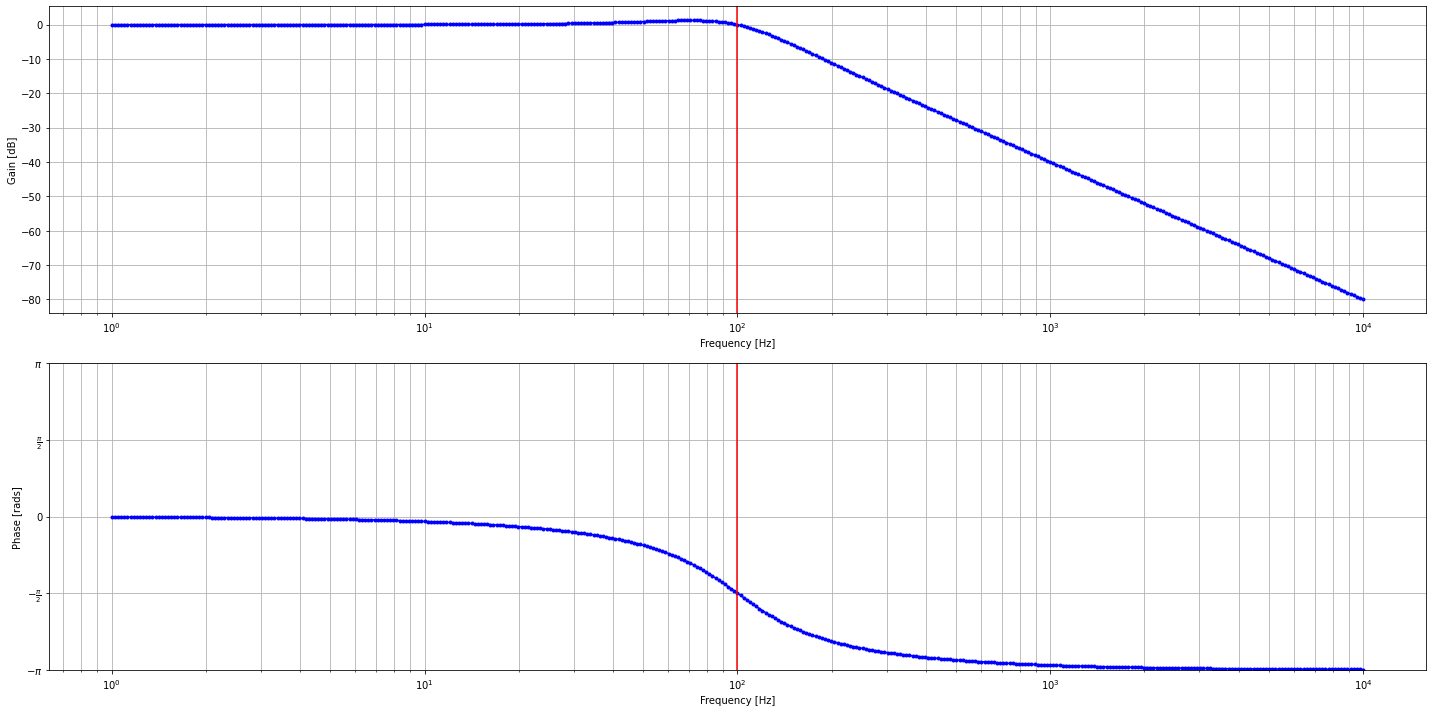

In [ ]:
# Part A - low pass filter that has cut-off (or resonant) frequency of 100 Hz, and 
#          that has a gain of 1 at the resonant frequency. Create a plot of the gain vs. frequency


# Calculate an L and C that provides a resonant frequcny of 100Hz
# 
# f = 1/(2*pi*sqrt(LC)), f = 100Hz
#
# RC = 1/(4*(pi^2)*(f^2))

resF = 100
LC_Val = 1 / float(4 * np.square(np.pi) * np.square(resF))
L_Val = np.sqrt(LC_Val)
C_Val = np.sqrt(LC_Val)

print(f"LC: {LC_Val}\nL, C: {L_Val}")
print(f"\nResonant Frequency Sanity-Check: {1/float(2*np.pi*np.sqrt(L_Val*C_Val))}")

# Determine Resitor value for Q-factor of 1
# Ensures gain of 1 (0 dB) at cut-off
#
#  Q = 1 / R * sqrt(L/C)
#
# R = 1 / Q * sqrt(L/C)
Q = 1
R_Val =  1 / Q * np.sqrt(L_Val/C_Val)

print(f"R: {R_Val}")
print(f"\nQ-Factor Sanity Check: {1 / R_Val * np.sqrt(L_Val / C_Val)}")

# Build the circuit
# Code Referenced from: https://pyspice.fabrice-salvaire.fr/releases/v1.3/examples/filter/rlc-filter.html
#                       https://github.com/ejmiers/phys421/blob/master/JupyterNotebooks/CircuitAnalysis_AC_RLC_Bode_GoogleColab.ipynb

circuit = Circuit('Low Pass Filter')

circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(1, 'in', 'R_out', R_Val@u_Ω)
L1 = circuit.L(1, 'R_out', 'out', L_Val@u_H)
C1 = circuit.C(1, 'out', circuit.gnd, C_Val@u_F)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

figure = plt.figure(1, (20, 10))
plt.title("Bode Diagram of a Low-Pass Filter")
axes = (plt.subplot(211), plt.subplot(212))
bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
         )
for axe in axes:
    axe.axvline(x=resF, color='red')

plt.tight_layout()
plt.show()


LC: 2.5330295910584447e-08
L, C: 0.00015915494309189535

Resonant Frequency Sanity-Check: 1000.0
R: 1.0

Q-Factor Sanity Check: 1.0
2020-12-19 02:00:13,691 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword
2020-12-19 02:00:13,735 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-19 02:00:13,737 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less


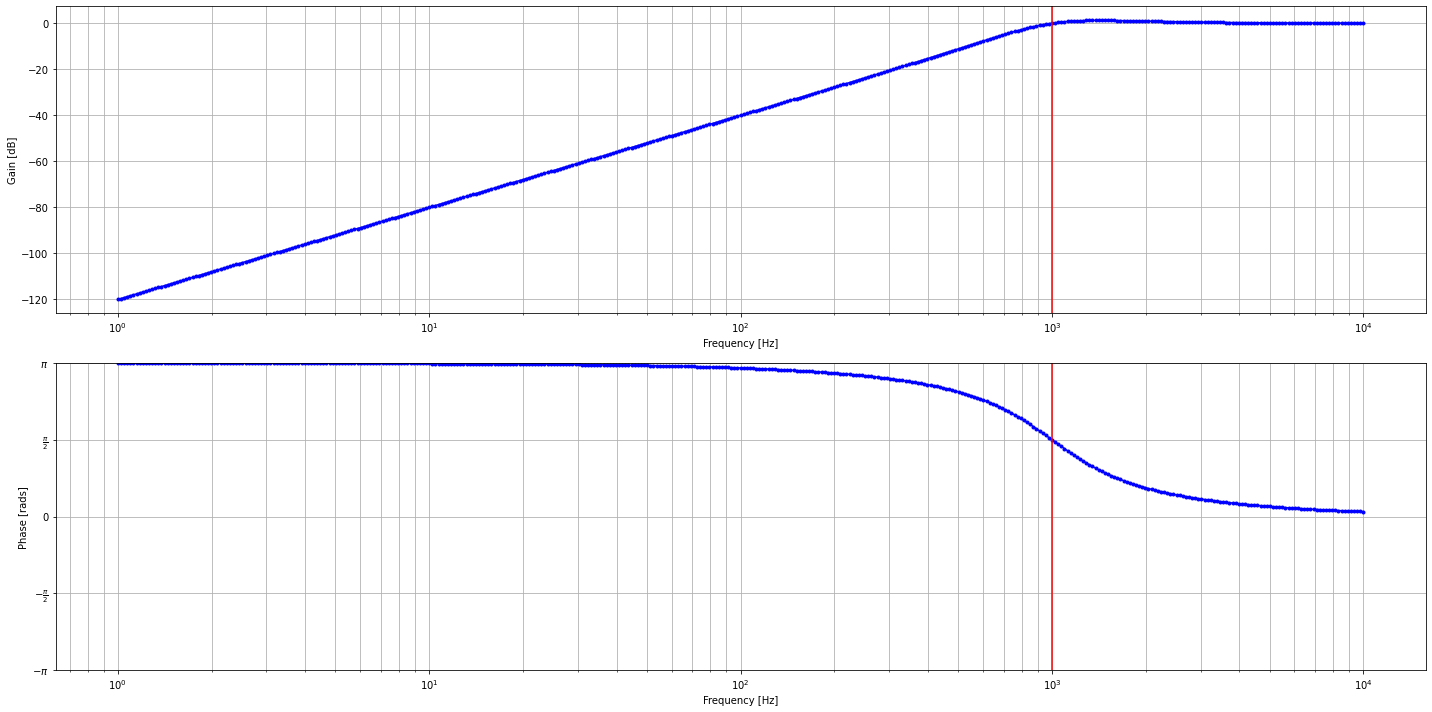

In [ ]:
# Part B - High pass filter that has a cut-off frequency of 1000 Hz, and that has a 
#          gain of 1 at the resonant frequency. Create a plot of the gain vs. frequency


# Calculate an L and C that provides a resonant frequcny of 100Hz
# 
# f = 1/(2*pi*sqrt(LC)), f = 100Hz
#
# RC = 1/(4*(pi^2)*(f^2))

resF = 1000
LC_Val = 1 / float(4 * np.square(np.pi) * np.square(resF))
L_Val = np.sqrt(LC_Val)
C_Val = np.sqrt(LC_Val)

print(f"LC: {LC_Val}\nL, C: {L_Val}")
print(f"\nResonant Frequency Sanity-Check: {1/float(2*np.pi*np.sqrt(L_Val*C_Val))}")

# Determine Resitor value for Q-factor of 1
# Ensures gain of 1 (0 dB) at cut-off
#
#  Q = 1 / R * sqrt(L/C)
#
# R = 1 / Q * sqrt(L/C)
Q = 1
R_Val =  1 / Q * np.sqrt(L_Val/C_Val)

print(f"R: {R_Val}")
print(f"\nQ-Factor Sanity Check: {1 / R_Val * np.sqrt(L_Val / C_Val)}")

# Build the circuit
# Code Referenced from: https://pyspice.fabrice-salvaire.fr/releases/v1.3/examples/filter/rlc-filter.html
#                       https://github.com/ejmiers/phys421/blob/master/JupyterNotebooks/CircuitAnalysis_AC_RLC_Bode_GoogleColab.ipynb

circuit = Circuit('High Pass Filter')

circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(1, 'in', 'R_out', R_Val@u_Ω)
C1 = circuit.C(1, 'R_out', 'out', C_Val@u_F)
L1 = circuit.L(1, 'out', circuit.gnd, L_Val@u_H)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=10@u_kHz, number_of_points=100,  variation='dec')

figure = plt.figure(1, (20, 10))
plt.title("Bode Diagram of a Low-Pass Filter")
axes = (plt.subplot(211), plt.subplot(212))
bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
         )
for axe in axes:
    axe.axvline(x=resF, color='red')

plt.tight_layout()
plt.show()

2020-12-19 02:18:54,192 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword
2020-12-19 02:18:54,243 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less
2020-12-19 02:18:54,244 - PySpice.Probe.WaveForm.WaveForm.__array_ufunc__ - WARNING - Should be unit less


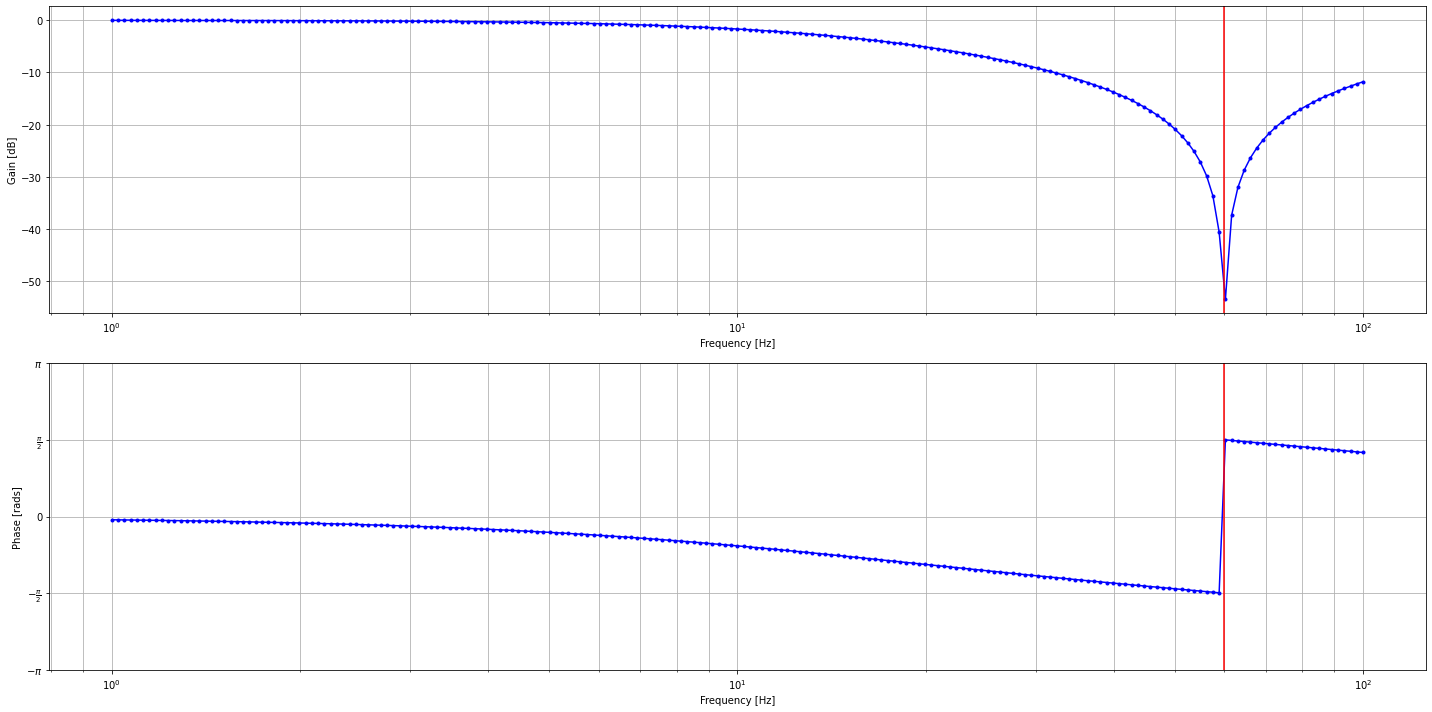

In [ ]:
# Part C - Design a twin-T notch filter with its "notch" at 60 Hz. The notch frequency is given by:
#                   f = 1 / (2*pi*RC)

notchF = 60
R_Val = 10
C_Val = 1 / float(2*np.pi*R_Val*notchF)

R3_Val = R_Val / 2
C3_Val = C_Val * 2

circuit = Circuit('T-notch Filter')

circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(1, 'in', 'R1_out', R_Val@u_Ω)
R2 = circuit.R(2, 'R1_out', 'out', R_Val@u_Ω)
C1 = circuit.C(1, 'in', 'C1_out', C_Val@u_F)
C2 = circuit.C(2, 'C1_out', 'out', C_Val@u_F)
R2 = circuit.R(3, 'C1_out', circuit.gnd, R3_Val@u_Ω)
C3 = circuit.C(3, 'R1_out', circuit.gnd, C3_Val@u_F)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=100@u_Hz, number_of_points=100,  variation='dec')

figure = plt.figure(1, (20, 10))
plt.title("Bode Diagram of a Low-Pass Filter")
axes = (plt.subplot(211), plt.subplot(212))
bode_diagram(axes=axes,
             frequency=analysis.frequency,
             gain=20*np.log10(np.absolute(analysis.out)),
             phase=np.angle(analysis.out, deg=False),
             marker='.',
             color='blue',
             linestyle='-',
         )
for axe in axes:
    axe.axvline(x=notchF, color='red')

plt.tight_layout()
plt.show()


## Question 2 - English Premier League Football

You should be able to start with the Jupyter notebook called WebScraperGDP.ipynb for each part of this question.

The goal of this question is to investigate whether there is an upward trend in the total number of points accrued by the winning team in the annual English Premier League football season.  

In order to get the data, you can use the following code:

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

from urllib.request import Request

url = Request('https://www.myfootballfacts.com/premier-league-winners/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(url)
html = webpage.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

(a) Make suitable modifications to extract the data into a pandas dataframe.  This will involve looking into the details of the BeautifulSoup object (soup) to understand the structure of the html code of the page.  This is the most involved part of this question, and is in general non-trivial.

(b) Construct a plot of total number of points per game played vs. year.  Note that in the earlier years of the EPL, teams played more games, and so points per game played is the appropriate variable.

(c) Carry out a linear regression fit to the data plotted in part (b) to determine if there is a statistically significant trend.  You should be able to use the linear regression fitting code that we developed for other assignments/in-class notebooks.

In [ ]:
# Part A - Make suitable modifications to extract the data into a pandas dataframe. This will involve looking into the details of the BeautifulSoup object (soup) to understand the structure of the html code of the page.

dataTable = soup.find(id="wptmTbl1319")
#print(dataTable.prettify())

# Get all years from the 'a' tag
years = [int(year.string[:-3]) for year in dataTable.findAll('a')]
yearNumber = [i for i in range(1, len(years)+1)]

# Setup data-structures for our other columns
teams = []
played = []
won = []
drawn = []
lost = []
goalsFor = []
goalsAgainst = []
goalDiff = []
points = []
ppg = []


# Get all other data from the row, add to global lists if exists
for i in range(1,100000):
  team = dataTable.find("td", class_="dtr{} dtc2".format(i))
  if team:
    teams.append(str(team.string))
    played.append(int(dataTable.find("td", class_="dtr{} dtc3".format(i)).string))
    won.append(int(dataTable.find("td", class_="dtr{} dtc4".format(i)).string))
    drawn.append(int(dataTable.find("td", class_="dtr{} dtc5".format(i)).string))
    lost.append(int(dataTable.find("td", class_="dtr{} dtc6".format(i)).string))
    goalsFor.append(int(dataTable.find("td", class_="dtr{} dtc7".format(i)).string))
    goalsAgainst.append(int(dataTable.find("td", class_="dtr{} dtc8".format(i)).string))
    goalDiff.append(int(dataTable.find("td", class_="dtr{} dtc9".format(i)).string))
    points.append(int(dataTable.find("td", class_="dtr{} dtc10".format(i)).string))
    ppg.append(float(dataTable.find("td", class_="dtr{} dtc11".format(i)).string))

  else:
    break
  
data = pd.DataFrame({
    "Year": years,
    "YearNumber": yearNumber,
    "Team": teams,
    "Played": played,
    "Won": won,
    "Lost": lost,
    "Goals For": goalsFor,
    "Goals Against": goalsAgainst,
    "Goal Differential": goalDiff,
    "Points": points,
    "PPG": ppg
})

data.head(100)

,Year,YearNumber,Team,Played,Won,Lost,Goals For,Goals Against,Goal Differential,Points,PPG
0,1992,1,Manchester United,42,24,6,67,31,36,84,2.00
1,1993,2,Manchester United,42,27,4,80,38,42,92,2.19
2,1994,3,Blackburn Rovers,42,27,7,80,39,41,89,2.12
3,1995,4,Manchester United,38,25,6,73,35,38,82,2.16
4,1996,5,Manchester United,38,21,5,76,44,32,75,1.97
5,1997,6,Arsenal,38,23,6,68,33,35,78,2.05
6,1998,7,Manchester United,38,22,3,80,37,43,79,2.08
7,1999,8,Manchester United,38,28,3,97,45,52,91,2.39
8,2000,9,Manchester United,38,24,6,79,41,38,80,2.11
9,2001,10,Arsenal,38,26,3,79,36,43,87,2.29


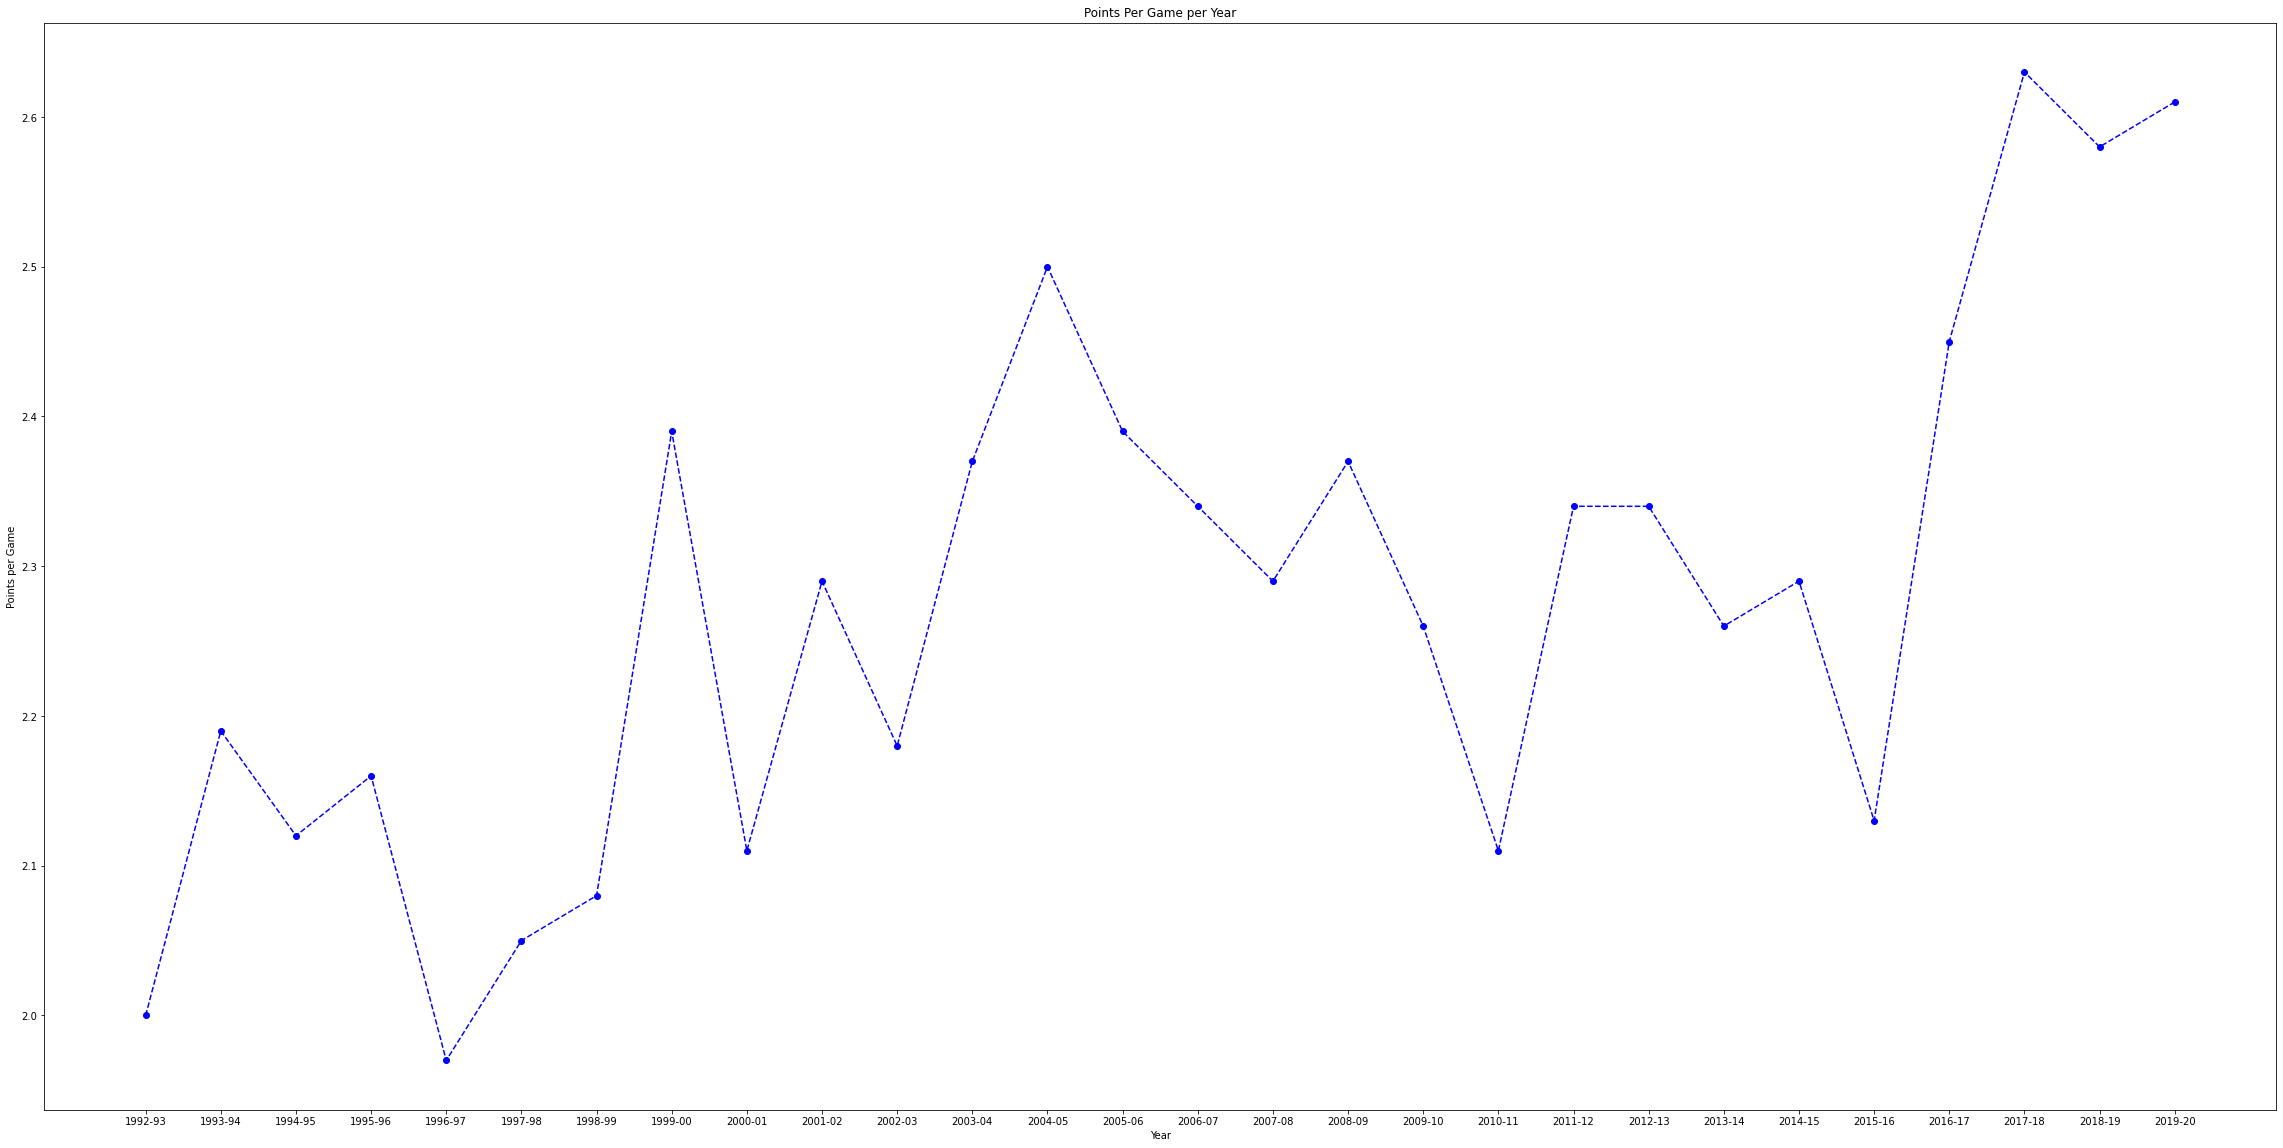

In [ ]:
# Part B - Construct a plot of total number of points per game played vs. year.

import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plt.plot(data["Year"], data["PPG"], '--bo')
plt.title("Points Per Game per Year")
plt.xlabel("Year")
plt.ylabel("Points per Game")
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    PPG   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     22.66
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           6.32e-05
Time:                        05:01:06   Log-Likelihood:                 17.861
No. Observations:                  28   AIC:                            -31.72
Df Residuals:                      26   BIC:                            -29.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0643      0.052     40.065      0.0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


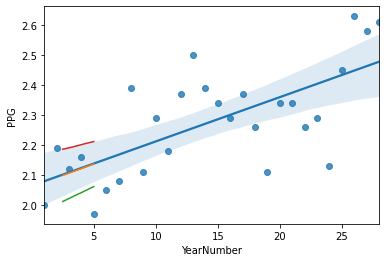

In [ ]:
# Carry out a linear regression fit to the data plotted in part (b) to determine if there is a statistically significant trend.

import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


result = sm.ols('PPG ~ YearNumber', data,).fit()

print(result.summary())

import seaborn as sns
sns.regplot('YearNumber', 'PPG', data, ci=95)

# Let's do a linear fit using the curve_fit utility from scipy, for comparision with seaborn regplot.

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
x = np.array(data['YearNumber'])
y = np.array(data['PPG'])
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(2.5,5.0,100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

plt.show()

A Linear Regression model was used to determine if their existed a statistical correlation between the points scored per game and the year (Year was converted to an index to match the requirments for the OLS model). According to the summary table, there appears to be a p-value of 0.000 for the year number. If this is true, this would indicate high statistical significance, and the null hypothesis is rejected.

## Question 3 - Ideal Gas Simulation

Begin with the example Jupyter Notebook called IdealGasSimulation.ipynb  

(a) The initial Jupyter notebook is set up to run a simulation with the following parameters:  total time = 400 seconds, time step = 0.1 seconds, V = constant = 2 m$^2$, and 1000 particles in the simulation. Also, the plots are created as a 3 x 3 grid, with the 3D particle position plot taking up the upper 2 x 2 frames of this grid.  Modify the simulation so as to have the following structure:

total time = 100 seconds, time step = 0.1 seconds, V = constant = 2.0 m$^2$

Remove the plots of the individual x/y/z coordinates.  Make the plot structure a 3 row x 1 column grid, with the 3D position plot in the top panel, the velocity distribution in the middle panel, and the pressure in the bottom panel.

Run the simulation with these new parameters and setup.  Do the results for the pressure and velocity distribution make sense?

b) Modify the simulation to consider the case where the volume is NOT constant.  You should only need to change one line in the code, in the final section.  There is already a commented line in the code there that will accomplish this.

Re-run the simulation, and comment on the form of the pressure curve.

-------------------
1000 1.2e-20 0.01 500 2 100 0.1
-------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:323: UserWarning: Attempting to set identical bottom == top == 3.812665990645247e-18 results in singular transformations; automatically expanding.


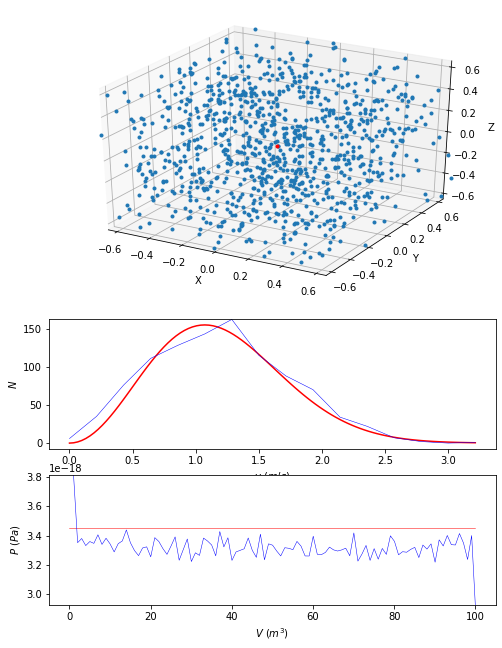

In [1]:
# Part A 

"""
=================
Ideal gas simulation
=================
Ideal gas simulation in a 3D system at temperature T and volume L^3,
where L is the length of the walls.
The particles that form the system only interact with the walls and 
between each other with elastic collisions, no other type of
interaction is considered (electromagnetic, gravitational...)
"""
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import types

plt.rcParams["figure.figsize"] = (8,11)

k_B = 1.380648e-23  # boltzmann contant (J/K)

def mod(v):
    """
        computes the squared sum over the last axis of the numpy.ndarray v
    """
    return np.sum(v * v, axis=-1)

def pmod(v, T, m):
    """
        Maxwell-Boltzmann's distribuion of probability 
        for the length of the velocity vector v at temprature T
        for a particle of mass m
    """
    return 4 * np.pi * v**2 * np.power(m / (2 * np.pi * k_B * T), 3 / 2) * np.exp(- m * v**2 / (2 * k_B * T))

class Simulation(animation.TimedAnimation):
    """
        Complete code for the ideal gas animation.
    """

    def __init__(self, n_particles, mass, rad, T, V, max_time, dt=0.2):
        """
            Initiallisation of parameters
            ::n_particles:: number of particles in the system
            ::mass:: of the particles (identicle for all of them)
            ::rad:: radius of the particles, notice that it must be
                    of the same order as (V/n_particles)^(1/3) in
                    order to see them colliding. If the radius is too
                    small then too few collisions would occur.
                    To remove completely the number of cillisions set the
                    radius to 0.
            ::T:: temperature of the system, this will define the initial
                    velocity of the particles
            ::V:: volume of the system, this could be a floating-point number or 
                    a function of time. If it is a number then the volume will
                    remain constant all the time, if it is a function then at each
                    iteration the volume will be update over time.
            ::max_time:: maximum animation time
        """
        
        print ("-------------------")
        print (n_particles,mass,rad,T,V,max_time,dt)
        print ("-------------------")

        self.PART = n_particles
        self.MASS = mass
        self.RAD = rad
        self.DIAM = 2 * rad

        self.T = T

        if isinstance(V, types.FunctionType):
            self.V0 = V(0)
            self.V = V
            self.Vconst = False
        else:
            self.V0 = V
            self.V = lambda t: V
            self.Vconst = True

        self.L = np.power(self.V0, 1/3) # side length
        self.halfL = self.L / 2
        self.A = 6 * self.L**2 # total surface area

        self.max_time = max_time
        self.dt = dt
        self.Nt = int(max_time / self.dt)

        self.evaluate_properties()

        # velocities histogram
        self.min_v = 0
        self.max_v = self.vmax * 3
        self.dv = 0.2 # (m/s)
        self.Nv = int((self.max_v - self.min_v) / self.dv)

        # pressure
        self.dP = 1 # (s)
        self.NP = int(max_time / self.dP)

        self.init_particles()
        self.init_figures()

        animation.TimedAnimation.__init__(self, self.fig, interval=1, blit=True, repeat=False)

    def evaluate_properties(self):
        """
            Calculates the initial properties of the system according
            to the laws of thermodynamics.
        """

        self.P = self.PART * k_B * self.T / self.V0
        self.U = 1.5 * self.PART * k_B * self.T
        self.vrms = np.sqrt(3 * k_B * self.T / self.MASS)
        self.vmax = np.sqrt(2 * k_B * self.T / self.MASS)
        self.vmed = np.sqrt(8 * k_B * self.T / (np.pi * self.MASS))

    def init_particles(self):
        """
            Initialize the particles positions and velocities.
            The initial positions are completely random inside the box.
            The initial velocities are generated by a random unitary vector with
            a length given by the average velocity (vmed) at the system temperature. 
        """
        self.r = np.random.rand(self.PART, 3) * 2.0 * (self.halfL - self.RAD) -(self.halfL - self.RAD)

        v_polar = np.random.random((self.PART, 2))

        self.v = np.zeros((self.PART, 3))

        self.v[:,0] = np.sin(v_polar[:,0] * np.pi) * np.cos(v_polar[:,1] * 2 * np.pi)
        self.v[:,1] = np.sin(v_polar[:,0] * np.pi) * np.sin(v_polar[:,1] * 2 * np.pi)
        self.v[:,2] = np.cos(v_polar[:,0] * np.pi)

        self.v *= self.vrms

    def init_figures(self):
        """
            Init the figures, axes, lines...
        """

        self.fig = plt.figure()

        self.ax1 = plt.subplot2grid((4, 1), (0, 0), colspan=2, rowspan=2, projection='3d') # 3D axes
        # self.ax2 = plt.subplot2grid((3, 3), (2, 0)) # x-y axes
        # self.ax3 = plt.subplot2grid((3, 3), (2, 1)) # y-z axes
        # self.ax4 = plt.subplot2grid((3, 3), (2, 2)) # x-z axes
        self.ax5 = plt.subplot2grid((4, 1), (2, 0)) # velocities axes
        self.ax6 = plt.subplot2grid((4, 1), (3, 0)) # pressure axes

        # Setup ax1: 3d
        box_limits = [-self.halfL, self.halfL]
        self.ax1.set_xlim3d(box_limits)
        self.ax1.set_xlabel('X')

        self.ax1.set_ylim3d(box_limits)
        self.ax1.set_ylabel('Y')

        self.ax1.set_zlim3d(box_limits)
        self.ax1.set_zlabel('Z')

        self.line_3d = self.ax1.plot([], [], [], ls='None', marker='.')[0]
        self.line_3d_cm = self.ax1.plot([0], [0], [0], ls='None', marker='.', color='r')[0]

        # setup ax2: x-y
        # self.ax2.set_xlabel(r'x')
        # self.ax2.set_ylabel(r'y')
        # self.ax2.set_xlim(box_limits)
        # self.ax2.set_ylim(box_limits)

        # self.line_xy = self.ax2.plot([], [], ls='None', marker='.')[0]
        # self.line_xy_cm = self.ax2.plot([0], [0], ls='None', marker='.', color='r')[0]

        # # setup ax3: y-z
        # self.ax3.set_xlabel(r'y')
        # self.ax3.set_ylabel(r'z')
        # self.ax3.set_xlim(box_limits)
        # self.ax3.set_ylim(box_limits)

        # self.line_yz = self.ax3.plot([], [], ls='None', marker='.')[0]
        # self.line_yz_cm = self.ax3.plot([0], [0], ls='None', marker='.', color='r')[0]

        # # setup ax4: x-z
        # self.ax4.set_xlabel(r'x')
        # self.ax4.set_ylabel(r'z')
        # self.ax4.set_xlim(box_limits)
        # self.ax4.set_ylim(box_limits)

        # self.line_xz = self.ax4.plot([], [], ls='None', marker='.')[0]
        # self.line_xz_cm = self.ax4.plot([0], [0], ls='None', marker='.', color='r')[0]

        # setup ax5: velocities
        vs = np.linspace(0, self.vmax * 3, 100)
        self.ax5.set_xlabel(r'$v\ (m/s)$')
        self.ax5.set_ylabel(r'$N$')
        #ax5.set_ylim(0, np.ceil(self.PART * pmod(self.vmax, self.T, self.MASS) / 5))
        self.ax5.plot(vs, self.PART * pmod(vs, self.T, self.MASS) * self.dv, color='r')

        self.vel_x = np.linspace(self.min_v, self.max_v, self.Nv)
        self.vel_y = np.zeros(self.Nv)

        self.line_vel = self.ax5.plot([], [], color='b', lw=0.5)[0]

        # setup ax5: pressure
        self.ax6.set_xlabel(r'$V\ (m^3)$')
        self.ax6.set_ylabel(r'$P\ (Pa)$')
        if self.Vconst:
            pt = self.PART * k_B * self.T / self.V0
            self.ax6.plot([0,self.max_time], [pt, pt], color='r', lw=0.5)
        else:
            Vx = self.V(np.linspace(0, self.max_time, self.Nt))
            self.ax6.plot(Vx, self.PART * k_B * self.T / Vx, color='r', lw=0.5)

        self.ex_p = 0.0 # accumulated exchanged momentum with the walls
        self.last_P = -1
        self.P_x = np.zeros(self.NP)
        self.P_y = np.zeros(self.NP)

        self.line_p = self.ax6.plot([], [], color='b', lw=0.5)[0]

        self._drawn_artists = [self.line_3d, self.line_3d_cm,
                 self.line_vel, self.line_p]

    def update_volume(self, t):
        """
            Sets the new volume and changes the axes limits.
        """

        self.V0 = self.V(t)
        self.L = np.power(self.V0, 1/3)
        self.halfL = self.L / 2
        self.A = 6 * self.L**2

        box_limits = [-self.halfL, self.halfL]
        self.ax1.set_xlim3d(box_limits)
        self.ax1.set_ylim3d(box_limits)
        self.ax1.set_zlim3d(box_limits)
        # self.ax2.set_xlim(box_limits)
        # self.ax2.set_ylim(box_limits)
        # self.ax3.set_xlim(box_limits)
        # self.ax3.set_ylim(box_limits)
        # self.ax4.set_xlim(box_limits)
        # self.ax4.set_ylim(box_limits)

    def _draw_frame(self, t):
        self.update_volume(t)

        # update the position
        self.r += self.dt * self.v

        # check for collisions with other particles
        dists = np.sqrt(mod(self.r - self.r[:,np.newaxis]))
        cols2 = (0 < dists) & (dists < self.DIAM)
        idx_i, idx_j = np.nonzero(cols2)
        # ***possibility to simplify this *** #
        for i, j in zip(idx_i, idx_j):
            if j < i:
                # skip duplications and same particle
                continue 

            rij = self.r[i] - self.r[j]
            d = mod(rij)
            vij = self.v[i] - self.v[j]
            dv = np.dot(vij, rij) * rij / d
            self.v[i] -= dv
            self.v[j] += dv

            # update the positions so they are no longer in contact
            self.r[i] += self.dt * self.v[i]
            self.r[j] += self.dt * self.v[j]

        # check for collisions with the walls
        walls = np.nonzero(np.abs(self.r) + self.RAD > self.halfL)
        self.v[walls] *= -1
        self.r[walls] -= self.RAD * np.sign(self.r[walls])

        # calc the position of the center of masses
        CM = np.sum(self.r, axis=0) / self.PART

        # plot the new coordinates
        self.line_3d.set_data(self.r[:,0], self.r[:,1])
        self.line_3d.set_3d_properties(self.r[:,2])

        self.line_3d_cm.set_data(CM[0], CM[1])
        self.line_3d_cm.set_3d_properties(CM[2])

        # self.line_xy.set_data(self.r[:,0], self.r[:,1])
        # self.line_xy_cm.set_data(CM[0], CM[1])

        # self.line_yz.set_data(self.r[:,1], self.r[:,2])
        # self.line_yz_cm.set_data(CM[1], CM[2])

        # self.line_xz.set_data(self.r[:,0], self.r[:,2])
        # self.line_xz_cm.set_data(CM[0], CM[2])

        # make velocities histogram
        v_mod = np.sqrt(mod(self.v))

        for k in range(self.Nv):
            self.vel_y[k] = np.count_nonzero((k*self.dv < v_mod) & (v_mod < (k + 1)*self.dv))

        self.line_vel.set_data(self.vel_x, self.vel_y)

        # add the momentum exchanged in this iteration to the accumulated one
        self.ex_p += 2 * self.MASS * np.sum(np.abs(self.v[walls]))
        i = int(t / self.dP)
        if i > self.last_P + 1:
            # calculate the pressure after self.dP seconds

            self.last_P = i - 1

            A_avg = self.A if self.Vconst else (self.A + 6 * np.power(self.V(t - self.dP), 2/3)) / 2 

            self.P_x[self.last_P] = (t if self.Vconst else self.V0)
            self.P_y[self.last_P] = self.ex_p / (self.dP * A_avg)

            self.ex_p = 0.0

            self.line_p.set_data(self.P_x[:i], self.P_y[:i])
            self.ax6.set_ylim(np.min(self.P_y[:i]), np.max(self.P_y[:i]))

    def new_frame_seq(self):
        return iter(np.linspace(0, self.max_time, self.Nt))

    def save_data(self):
        with open('pressure.txt', 'w') as outf:
            t = np.linspace(0, self.max_time, self.NP)
            for i in range(self.NP):
                outf.write('%.5f\t%.5f\t%.5g\n' % (t[i], self.P_x[i], self.P_y[i]))

        with open('hist_vel.txt', 'w') as outf:
            for i in range(self.Nv):
                outf.write('%.5f\t%.5g\n' % (self.vel_x[i], self.vel_y[i]))

def V(t, V0, Vf, t_max):
    return V0 + (Vf - V0) * t / t_max

PARTICLES = 1000
MASS = 1.2e-20
RADIUS = 0.01
TEMPERATURE = 500
V0, Vf = 0.5, 15
T_MAX = 100

ani = Simulation(PARTICLES, MASS, RADIUS, TEMPERATURE, 2, T_MAX, 0.1)
#ani = Simulation(PARTICLES, MASS, RADIUS, TEMPERATURE, lambda t: V(t, V0, Vf, T_MAX), T_MAX, 0.1)
#ani.save('test_sub.mp4', writer='imagemagick', fps=5)
ani.save('test_sub.mp4', fps=30)
plt.show()
ani.save_data()

The second graph is the Maxwell-Boltzman Distribution of velocities for gaseous particles. It is a probabilitiy distribution that describes how many particles are expected to be moving with a given velocity. This curve is scaled by the temperature of the system (as per the Maxwell-Boltzman function). For colder gasses, the curve has a tall and narrow shape. For hot gasses, the curve is expected to have a short and wider shape. The curve has a wider appearance which makes sense given that the temperature is quite large at 500K.

The Pressure graph shows an oscillation around 3.4 Pascals. According to the ideal gas law, pressure is calculated as P = nRT/V. This means the pressure is constant if the number of moles, temperature, and volume are constant ("R" is the universal gas constant). As a result, we would expect the graph to converge around a constant pressure if these three parameters are kept constant (which they are in this initial simulation).

-------------------
1000 1.2e-20 0.01 500 <function <lambda> at 0x7fe32eb93d08> 100 0.1
-------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:323: UserWarning: Attempting to set identical bottom == top == 1.3779015342835693e-17 results in singular transformations; automatically expanding.


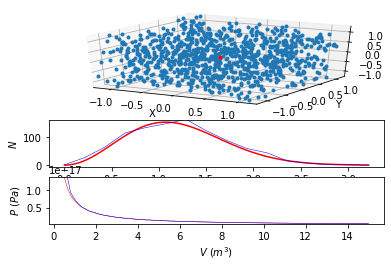

In [2]:
# Part B - Simulation with changing Volume

PARTICLES = 1000
MASS = 1.2e-20
RADIUS = 0.01
TEMPERATURE = 500
V0, Vf = 0.5, 15
T_MAX = 100

#function 'V' passed as argument to simulation constructor
ani = Simulation(PARTICLES, MASS, RADIUS, TEMPERATURE, lambda t: V(t, V0, Vf, T_MAX), T_MAX, 0.1)

ani.save('test_sub2.mp4', fps=30)
plt.show()
ani.save_data()

The results for the pressure graph are as expected. According to the ideal gas law, the pressure can be calculated as P = nRT/V . This formula implies an inverse proportional relationship between P and V (P α 1/V), where pressure decreases as volume increases. This results in a decreasing parabolic shape as volume increases, if the number of moles (n) and the temperature (T) is kept constant.